<a href="https://colab.research.google.com/github/2303A51923/ADM-LAB/blob/main/ADM_LAB_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)


In [7]:
data['PRICE']=california_housing.target
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [8]:
#check for missing values
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [11]:
#define features and target variable
x=data.drop('PRICE',axis=1)
y=data['PRICE']

#split dataset (80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
#intialize and train the model
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [16]:
#preddictions
y_pred=model.predict(x_test)

#model performance
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:2f}")
print(f"R-squared: {r2:2f}")

Mean Squared Error: 0.555892
R-squared: 0.575788


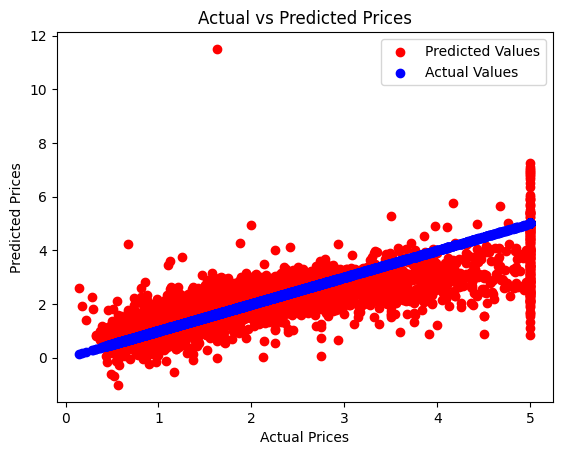

In [25]:
#plot predicted values in red
plt.scatter(y_test,y_pred,color='red',label='Predicted Values')

#plot predicted values in blue
plt.scatter(y_test,y_test,color='blue',label='Actual Values')

#labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()